# Upload Datasets

This dataset I downloaded from UCI Machine Learning Repository. It contains 8 features and 1 classification label column in 3 classes, I will use 90% of the dataset as training data, and the rest are testing data. And there are 3 nodes in output layer. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data/abalone.csv',header=None)
data

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [2]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data[0] = le.fit_transform(data[0])
data

,0,1,2,3,4,5,6,7,8
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# Create possible active functions and derivatives

In [3]:
def sigmoid(x):  
    return 1/(1 + np.exp(-1*x))

def sigmoid_d(x):
    return sigmoid(x) * (1-sigmoid(x))

def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

def tanh_d(x):
    return 1 - tanh(x)**2

def relu(x):
    return np.maximum(0,x)

def relu_d(x):
    x[x<0] = 0
    x[x>=0] = 1
    return x

def softmax(x):
    exp = np.exp(x)
    scores = exp / exp.sum(axis=1, keepdims=True)
    
    return scores

# First randomly initialize weights and bias

In [4]:
def initialization(num_input, num_hidden, num_output):
    parameters = {}
    
    parameters['weight_hidden'] = np.random.rand(num_input,num_hidden)
    parameters['weight_output'] = np.random.rand(num_hidden,num_output)
    
    parameters['bias_hidden'] = np.zeros((1, num_hidden))
    parameters['bias_output'] = np.zeros((1, num_output))
    
    return parameters

# Define forward propagation

In [5]:
def activate(f, activation):
    if activation == 'sigmoid':
        a = sigmoid(f)
    elif activation == 'tanh':
        a = tanh(f)
    elif activation == 'relu':
        a = relu(f)
        
    return a

def activate_derivative(f, activation):
    if activation == 'sigmoid':
        a_d = sigmoid_d(f)
    elif activation == 'tanh':
        a_d = tanh_d(f)
    elif activation == 'relu':
        a_d = relu_d(f)

    return a_d

For this dataset, I want to define a model that use different activation funciton on hidden layer and output layer, since there are multiple nodes in output layer, so I fixed to use softmax activation funciton in output layer, and other function in hidden layer

In [6]:
def forward(x, parameters, activation):
    predict = {}
    
    predict['input_hidden'] = np.dot(x, parameters['weight_hidden']) + parameters['bias_hidden']
    predict['output_hidden'] = activate(predict['input_hidden'], activation)
        
    predict['input_output'] = np.dot(predict['output_hidden'], parameters['weight_output']) + parameters['bias_output']
    predict['predict_y'] = softmax(predict['input_output'])
    
    return predict

# Define Backpropagation

Since I used softmax in output layer and used cross entropy as cost funciton, so when update the weights in output layer, the derivative of cross entropy loss with softmax is $\hat{Y} - Y$

https://stackabuse.com/creating-a-neural-network-from-scratch-in-python-multi-class-classification/ 

In [7]:
def backpropagation(x, y, parameters, predict, learning_rate, activation):
    # derivative of cross entropy loss with softmax
    der_cross_softmax = predict['predict_y'] - y
    
    dw_output = np.dot(predict['output_hidden'].T, der_cross_softmax)
    db_output = np.sum(der_cross_softmax, axis=0,keepdims=True)
    
    p2 = np.dot(der_cross_softmax,parameters['weight_output'].T)
    activate_dhidden = activate_derivative(predict['input_hidden'],activation)
    dw_hidden = np.dot(x.T, activate_dhidden * p2)
    db_hidden = np.sum(p2 * activate_dhidden, axis=0,keepdims=True)
    
    parameters['weight_hidden'] -= learning_rate * dw_hidden
    parameters['weight_output'] -= learning_rate * dw_output
    parameters['bias_hidden'] -= learning_rate * db_hidden
    parameters['bias_output'] -= learning_rate * db_output
    
    return parameters

# Generate neural network model

Now create the neural network model. For this model, I used Cross Entropy as the cost funciton

Cross Entropy: $-\sum (Y * log(\hat{Y}))$

In [8]:
def NN_model(x, y, hidden_width, activation, learning_rate, epochs):
    parameter = initialization(x.shape[1], hidden_width, y.shape[1])
    LOSS = []
    for epoch in range(epochs):
        
        prediction = forward(x,parameter,activation)

        # cross entropy
        loss = (-np.sum(y * np.log(prediction['predict_y'])))/y.shape[0]
        LOSS.append(loss)

        
        parameter = backpropagation(x, y, parameter, prediction, learning_rate, activation)
        
        if epoch % 1000 == 0:
            print("After %d epochs, Cross Entropy is now: %f" % (epoch, loss))
        
    return parameter, prediction, LOSS

# Make predition on testing data and calculate accuracy

In [9]:
def predict_model(x, y, parameter, hidden_width, activation):
    prediction = forward(x, parameter, activation)
    
    predict_y = np.argmax(prediction['predict_y'],axis=1)
    y_label = np.argmax(y,axis=1)
    correct_predictions = np.sum(predict_y == y_label)
    accuracy = correct_predictions / len(y_label)
    return accuracy
    

In [10]:
# use 90% of the dataset as training data, and rest as testing data
training_data = data[:int(0.9*len(data))]
testing_data = data[int(0.9*len(data)):]

sample_training = np.array(training_data.drop([0], axis=1))
label_training = np.array(pd.get_dummies(training_data[0].values))

sample_testing = np.array(testing_data.drop([0], axis=1))
label_testing = np.array(pd.get_dummies(testing_data[0].values))

After 0 epochs, Cross Entropy is now: 1.239760
After 1000 epochs, Cross Entropy is now: 0.971453
After 2000 epochs, Cross Entropy is now: 0.908391
After 3000 epochs, Cross Entropy is now: 0.890025
After 4000 epochs, Cross Entropy is now: 0.883983
After 5000 epochs, Cross Entropy is now: 0.880917
After 6000 epochs, Cross Entropy is now: 0.878595
After 7000 epochs, Cross Entropy is now: 0.876601
After 8000 epochs, Cross Entropy is now: 0.874848
After 9000 epochs, Cross Entropy is now: 0.873308


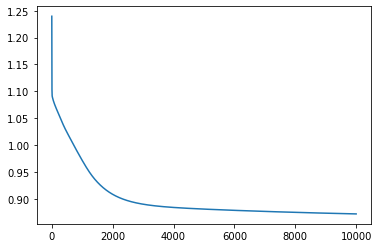

In [11]:
parameter,prediction,LOSS = NN_model(sample_training, label_training, 20, 'sigmoid', 0.00001, 10000)
x = np.arange(0,10000)
plt.figure()
plt.plot(x,LOSS)
plt.show()

In [12]:
accuracy = predict_model(sample_testing, label_testing, parameter, 20, 'sigmoid')
print("The prediction accuracy is: %f" % accuracy)

The prediction accuracy is: 0.533493


The plot shows the cost value of each epoch during the training. From the plot, we can see that the cost value is reduced during the model training, however, it still a high cost in the end, and the accurcy in predict testing data is only 53%, which is not a very good prediction model. I assume this may because this is a multi-classification data, so it need a more complex model to predict, for example, have more hidden layer or more number of nodes in each hidden layer may effect the accuracy.

I then tested this model will different activation function. The result shows that the training is more faster when using ReLu activation function, and tanh is more accurate. 

After 0 epochs, Cross Entropy is now: 7.882140
After 1000 epochs, Cross Entropy is now: 0.880742
After 2000 epochs, Cross Entropy is now: 0.873749
After 3000 epochs, Cross Entropy is now: 0.872328
After 4000 epochs, Cross Entropy is now: 0.871856
After 5000 epochs, Cross Entropy is now: 0.871420
After 6000 epochs, Cross Entropy is now: 0.870717
After 7000 epochs, Cross Entropy is now: 0.870063
After 8000 epochs, Cross Entropy is now: 0.869605
After 9000 epochs, Cross Entropy is now: 0.870440


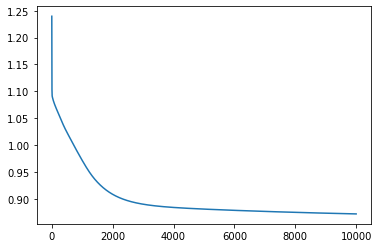

The prediction accuracy is: 0.543062


In [13]:
parameter,prediction,MSE = NN_model(sample_training, label_training, 20, 'relu', 0.00001, 10000)
x = np.arange(0,10000)
plt.figure()
plt.plot(x,LOSS)
plt.show()

accuracy = predict_model(sample_testing, label_testing, parameter, 20, 'relu')
print("The prediction accuracy is: %f" % accuracy)

After 0 epochs, Cross Entropy is now: 1.178746
After 1000 epochs, Cross Entropy is now: 0.892718
After 2000 epochs, Cross Entropy is now: 0.885063
After 3000 epochs, Cross Entropy is now: 0.875349
After 4000 epochs, Cross Entropy is now: 0.872329
After 5000 epochs, Cross Entropy is now: 0.870363
After 6000 epochs, Cross Entropy is now: 0.868470
After 7000 epochs, Cross Entropy is now: 0.866510
After 8000 epochs, Cross Entropy is now: 0.863103
After 9000 epochs, Cross Entropy is now: 0.861170


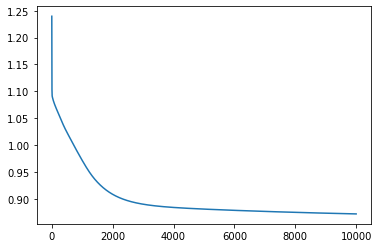

The prediction accuracy is: 0.566986


In [14]:
parameter,prediction,MSE = NN_model(sample_training, label_training, 20, 'tanh', 0.00001, 10000)
x = np.arange(0,10000)
plt.figure()
plt.plot(x,LOSS)
plt.show()

accuracy = predict_model(sample_testing, label_testing, parameter, 20, 'tanh')
print("The prediction accuracy is: %f" % accuracy)